In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
def make_plot(data_frame, title, if_10 = False):
  plt.figure(figsize=(15, 5))
  dff = data_frame.rename(
      columns={'AVG_acc': 'Dokładność',
               'AVG_loss': 'Funkcja kosztu',
               'Column2': 'Runda',
               'Column3' : 'Liczba serwerow'})
  print(dff.columns)

  plt.subplot(121)
  plt.title('Dokładność dla ' + title)
  p1 = sns.lineplot(data=dff, x='Runda', y='Dokładność', hue='Liczba serwerow', palette='dark')
  plt.subplot(122)
  plt.title('Funkcja kosztu dla ' + title)
  p2 = sns.lineplot(data=dff, x='Runda', y='Funkcja kosztu', hue='Liczba serwerow', palette='dark')

def make_plot_normal(data_frame, title):
  plt.figure(figsize=(15, 5))
  dff = data_frame.rename(
      columns={'accuracy': 'Dokładność',
               'loss': 'Funkcja kosztu',
               'epoch': 'Runda'})
  print(dff.columns)

  plt.subplot(121)
  plt.title('kosztu dla ' + title)
  plt.plot(dff['Runda'],dff['Funkcja kosztu'])
  plt.fill_between(dff['Runda'], (dff['Funkcja kosztu']-dff['interval_loss']), (dff['Funkcja kosztu']+dff['interval_loss']), color='b', alpha=.1)
  plt.subplot(122)
  plt.title('dokldamodść dla ' + title)
  plt.plot(dff['Runda'],dff['Dokładność'])
  plt.fill_between(dff['Runda'], (dff['Dokładność']-dff['interval_acc']), (dff['Dokładność']+dff['interval_acc']), color='b', alpha=.1)


def smaller_sampling(data_frame):
  to_delete = []
  delete = 0
  for i in range(len(data_frame)):
    if delete == 1:
      to_delete.append(i)
      delete = 0
    else:
      delete = 1
  return data_frame.drop(data_frame.index[to_delete])

def make_plot_interval(data_frame, title):
  plt.figure(figsize=(15, 5))
  dff = data_frame.rename(
      columns={'AVG_acc': 'Dokładność',
               'AVG_loss': 'Funkcja kosztu',
               'Column2': 'Runda',
               'Column3' : 'Liczba serwerow'})

  plt.subplot(121)
  plt.title('kosztu dla ' + title)
  plt.plot(dff['Runda'],dff['Funkcja kosztu'])
  plt.fill_between(dff['Runda'], (dff['Funkcja kosztu']-dff['interval_loss']), (dff['Funkcja kosztu']+dff['interval_loss']), color='b', alpha=.1)
  plt.subplot(122)
  plt.title('dokldamodść dla ' + title)
  plt.plot(dff['Runda'],dff['Dokładność'])
  plt.fill_between(dff['Runda'], (dff['Dokładność']-dff['interval_acc']), (dff['Dokładność']+dff['interval_acc']), color='b', alpha=.1)
  plt.ylim(0, 0.03)

In [3]:
buffor = pd.read_csv('/content/drive/MyDrive/inz/cifar_all_to_notebook.csv')
buffor = smaller_sampling(buffor)

In [4]:
buffor.head()

,Column1,Column2,Column3,AVG_acc,AVG_loss,interval_acc,interval_loss
0,0,0,10,0.01000,4.605163,0.006842,0.000084
2,2,4,10,0.01002,4.605162,0.007023,0.000088
4,4,8,10,0.01028,4.605160,0.006249,0.000088
6,6,12,10,0.01070,4.605157,0.005747,0.000091
8,8,16,10,0.01096,4.605154,0.005556,0.000092


Index(['Column1', 'Runda', 'Liczba serwerow', 'Dokładność', 'Funkcja kosztu',
       'interval_acc', 'interval_loss'],
      dtype='object')


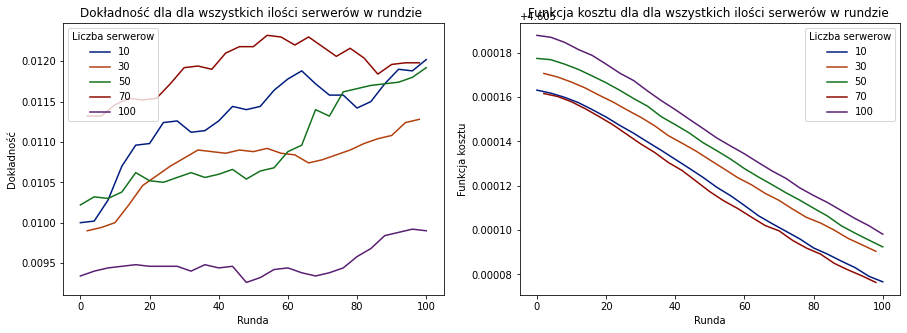

In [5]:
make_plot(buffor, "dla wszystkich ilości serwerów w rundzie ")

Index(['Runda', 'Dokładność', 'Funkcja kosztu', 'interval_acc',
       'interval_loss'],
      dtype='object')


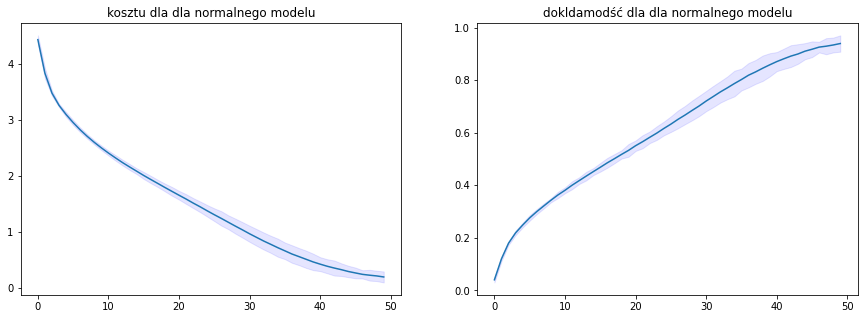

In [15]:
buffor = pd.read_csv('/content/drive/MyDrive/inz/CIFAR_ALL_NORMAL_to_notebook.csv')
make_plot_normal(buffor, "dla normalnego modelu")

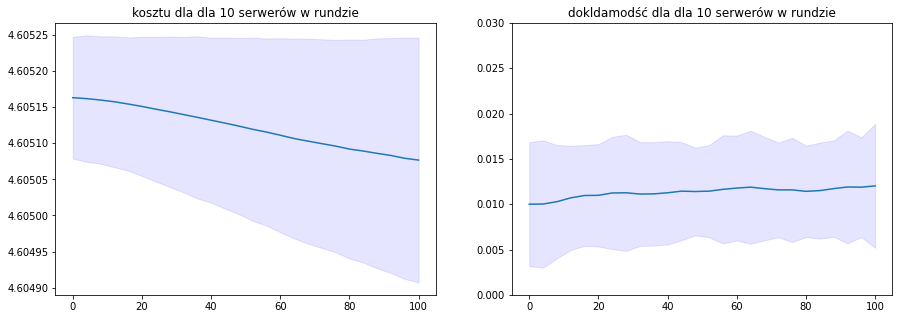

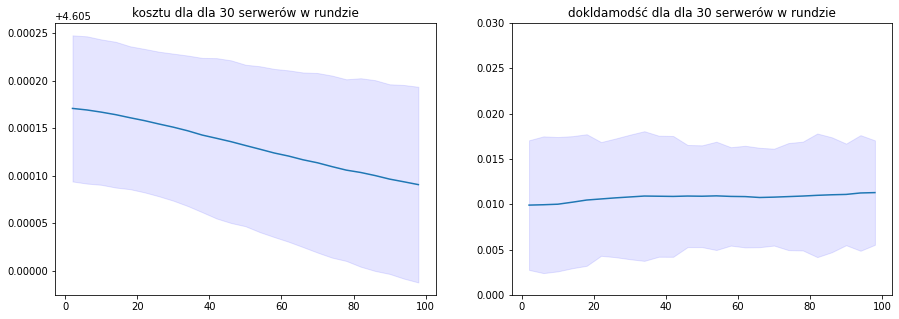

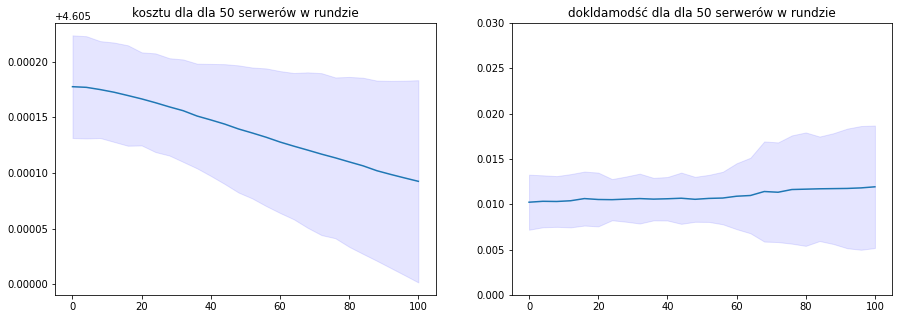

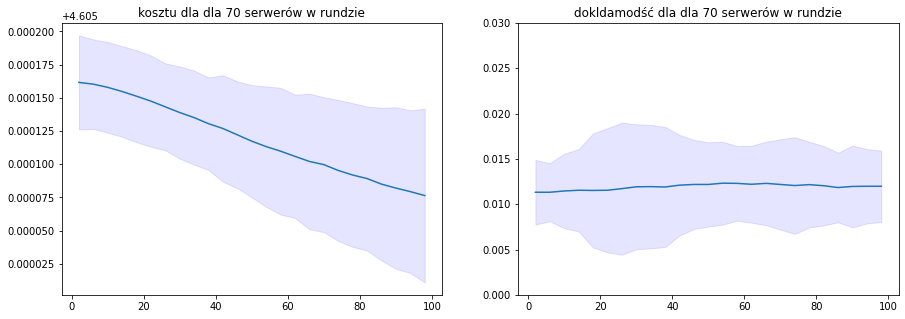

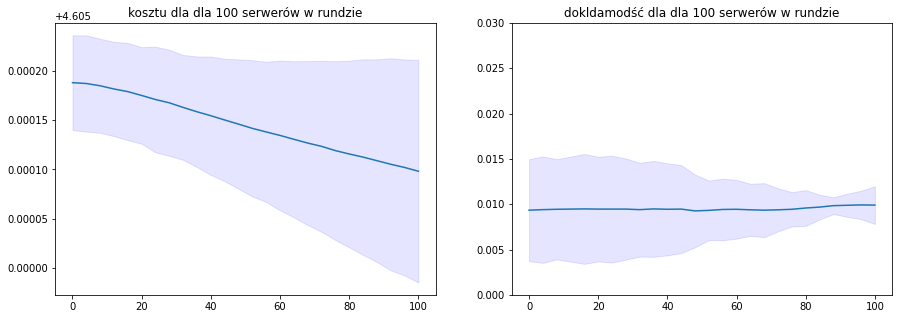

In [6]:
buffor_10 = buffor[buffor.Column3 == 10]
make_plot_interval(buffor_10, "dla 10 serwerów w rundzie")

buffor_30 = buffor[buffor.Column3 == 30]
make_plot_interval(buffor_30, "dla 30 serwerów w rundzie")

buffor_50 = buffor[buffor.Column3 == 50]
make_plot_interval(buffor_50, "dla 50 serwerów w rundzie")

buffor_70 = buffor[buffor.Column3 == 70]
make_plot_interval(buffor_70, "dla 70 serwerów w rundzie")

buffor_100 = buffor[buffor.Column3 == 100]
make_plot_interval(buffor_100, "dla 100 serwerów w rundzie")

In [18]:
buffor.columns


Index(['epoch', 'accuracy', 'loss', 'interval_acc', 'interval_loss'], dtype='object')

In [19]:
from tabulate import tabulate

table = [['ilość serwerów w rundzie', 'funkcja kosztu', 'średni poziom ufności funkcji kosztu', 'dokładność', 'średni poziom ufności dokładności'],
         [str(10),  str(buffor_10['AVG_loss'].min()), str(buffor_10['interval_loss'].mean()), str(buffor_10['AVG_acc'].max()), str(buffor_10['interval_acc'].mean())],
         [str(30),  str(buffor_30['AVG_loss'].min()), str(buffor_30['interval_loss'].mean()), str(buffor_30['AVG_acc'].max()), str(buffor_30['interval_acc'].mean())],
         [str(50),  str(buffor_50['AVG_loss'].min()), str(buffor_50['interval_loss'].mean()), str(buffor_50['AVG_acc'].max()), str(buffor_50['interval_acc'].mean())],
         [str(70),  str(buffor_70['AVG_loss'].min()), str(buffor_70['interval_loss'].mean()), str(buffor_70['AVG_acc'].max()), str(buffor_70['interval_acc'].mean())],
         [str(100),  str(buffor_100['AVG_loss'].min()), str(buffor_100['interval_loss'].mean()), str(buffor_100['AVG_acc'].max()), str(buffor_100['interval_acc'].mean())],
         ['N/A', str(buffor['loss'].min()), str(buffor['interval_loss'].mean()), str(buffor['accuracy'].max()), str(buffor['interval_acc'].mean())]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════════════════╤══════════════════╤════════════════════════════════════════╤══════════════╤═════════════════════════════════════╕
│ ilość serwerów w rundzie   │   funkcja kosztu │   średni poziom ufności funkcji kosztu │   dokładność │   średni poziom ufności dokładności │
╞════════════════════════════╪══════════════════╪════════════════════════════════════════╪══════════════╪═════════════════════════════════════╡
│ 10                         │         4.60508  │                            0.000124746 │     0.01202  │                          0.0058097  │
├────────────────────────────┼──────────────────┼────────────────────────────────────────┼──────────────┼─────────────────────────────────────┤
│ 30                         │         4.60509  │                            8.70108e-05 │     0.01128  │                          0.00635259 │
├────────────────────────────┼──────────────────┼────────────────────────────────────────┼──────────────┼───────────────────────────────